In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing as pu
from sklearn.preprocessing import LabelEncoder
import pickle

In [3]:
df=pd.read_csv('dataset/Training Data.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [7]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
#missing.plot.bar()
missing

Series([], dtype: int64)

 No Missing value

# No Null Value

In [8]:
# Checking categorical columns
for col in df.dtypes[df.dtypes == object].index:
    print('Unique items in column',col,'are:',df[col].unique())
    print('-'*100)

Unique items in column married are: ['single' 'married']
----------------------------------------------------------------------------------------------------
Unique items in column house_ownership are: ['rented' 'norent_noown' 'owned']
----------------------------------------------------------------------------------------------------
Unique items in column car_ownership are: ['no' 'yes']
----------------------------------------------------------------------------------------------------
Unique items in column profession are: ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_

In [9]:
num_col=[col for col in df.columns if df[col].dtype!='O']
cat_col=list(set(df.columns)-set(num_col))

In [10]:
num_col

['Id',
 'income',
 'age',
 'experience',
 'current_job_years',
 'current_house_years',
 'risk_flag']

In [11]:
cat_col

['married', 'city', 'state', 'car_ownership', 'house_ownership', 'profession']

In [12]:
df_final, Encoders=pu.Cat2Num(df)

['married', 'house_ownership', 'car_ownership']


In [13]:
#Encoders={}
#for col in cat_col:
#    Encoders['L_enc_'+str(col)]=LabelEncoder()
#    df[col]=Encoders['L_enc_'+str(col)].fit_transform(df[col])
    

In [14]:
Encoders

{'L_enc_state': LabelEncoder(),
 'L_enc_city': LabelEncoder(),
 'L_enc_profession': LabelEncoder(),
 'OH_enc_': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [15]:
df_final.head()

,age,current_house_years,Id,experience,current_job_years,income,risk_flag,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,car_ownership_no,car_ownership_yes,state,city,profession
0,23,13,1,3,3,1303835,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,13,251,33
1,40,13,2,10,9,7574516,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,14,227,43
2,66,10,3,4,4,3991815,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,12,8,47
3,41,12,4,2,2,6256451,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,17,54,43
4,47,14,5,11,3,5768871,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,22,296,11


In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   age                           252000 non-null  int64  
 1   current_house_years           252000 non-null  int64  
 2   Id                            252000 non-null  int64  
 3   experience                    252000 non-null  int64  
 4   current_job_years             252000 non-null  int64  
 5   income                        252000 non-null  int64  
 6   risk_flag                     252000 non-null  int64  
 7   married_married               252000 non-null  float64
 8   married_single                252000 non-null  float64
 9   house_ownership_norent_noown  252000 non-null  float64
 10  house_ownership_owned         252000 non-null  float64
 11  house_ownership_rented        252000 non-null  float64
 12  car_ownership_no              252000 non-nul

In [17]:
y=df_final['risk_flag']
X=df_final.drop(['risk_flag','Id'],axis=1)

# Distribution of data

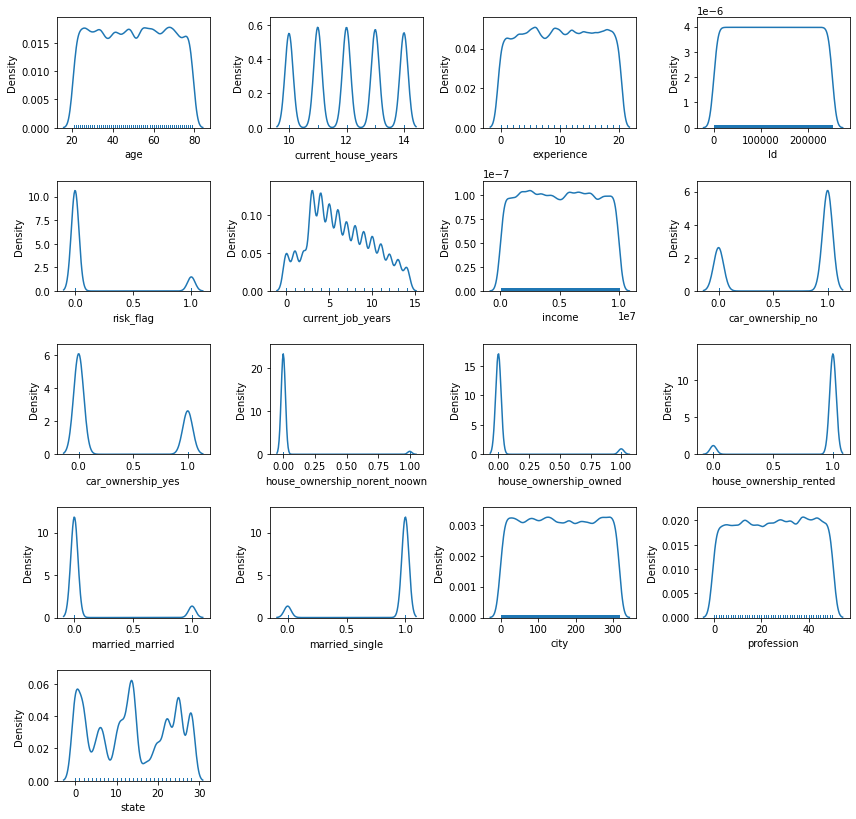

In [17]:
fig = plt.figure(figsize=(12,36))
for i in range(len(df_final.columns)):
    fig.add_subplot(16,4,i+1)
    sns.distplot(df_final.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(df_final.columns[i])
plt.tight_layout()
plt.show()

# Univariate Analysis

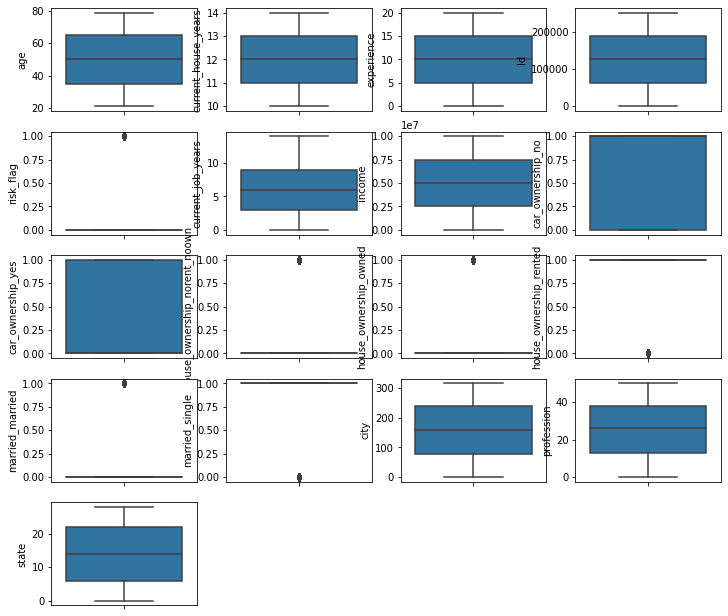

In [18]:
# Univariate Analysis: Box plots

fig = plt.figure(figsize=(12,36))
for i in range(len(df_final.columns)):
    fig.add_subplot(16,4,i+1)
    sns.boxplot(y=df_final.iloc[:,i])


# Bivariate Analysis: Bar plots (it will take time)

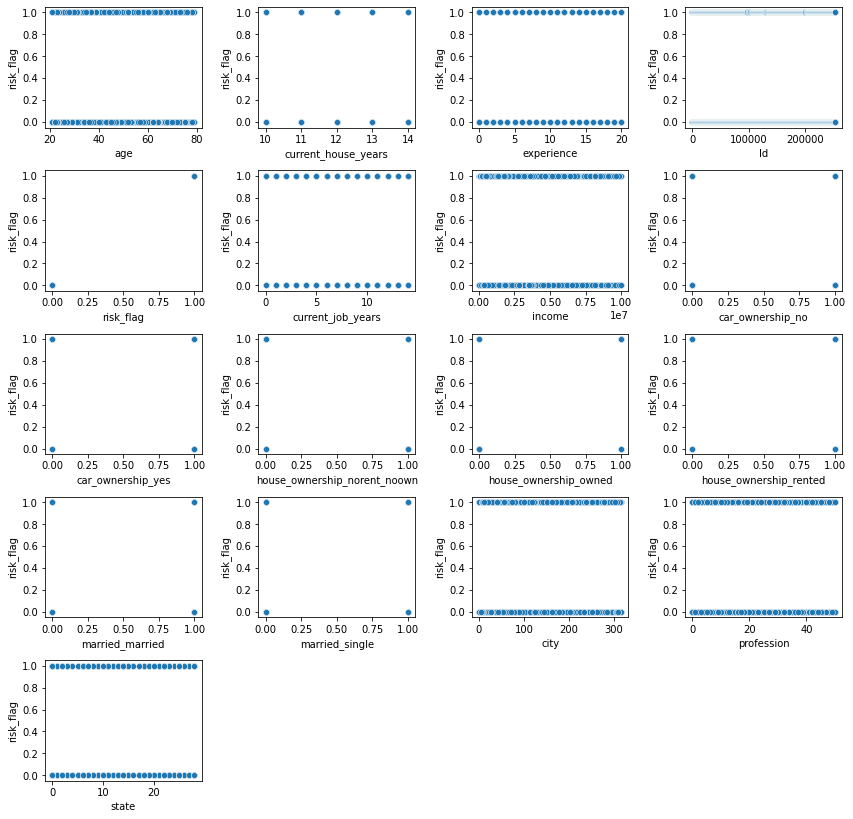

In [19]:
# Bivariate Analysis: Bar plots

fig = plt.figure(figsize=(12,36))
for i in range(len(df_final.columns)):
    fig.add_subplot(16,4,i+1)
    sns.scatterplot(x=df_final.iloc[:,i],y=df_final['risk_flag'])

plt.tight_layout()
plt.show()

# Correlation Analysis

In [18]:
df_corr = df_final.corr()
index = df_corr.index

<AxesSubplot:>

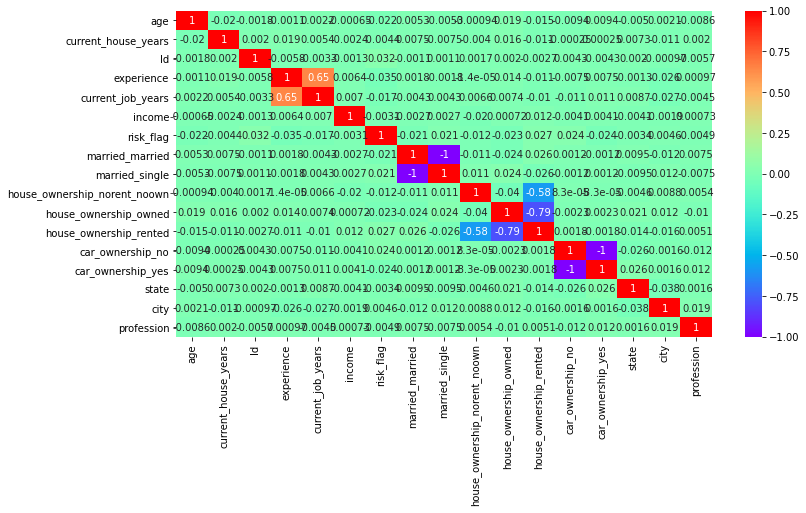

In [19]:
plt.figure(figsize = (12,6))
sns.heatmap(df_final[index].corr(),annot = True,cmap = 'rainbow')

<AxesSubplot:title={'center':'High Correlation'}>

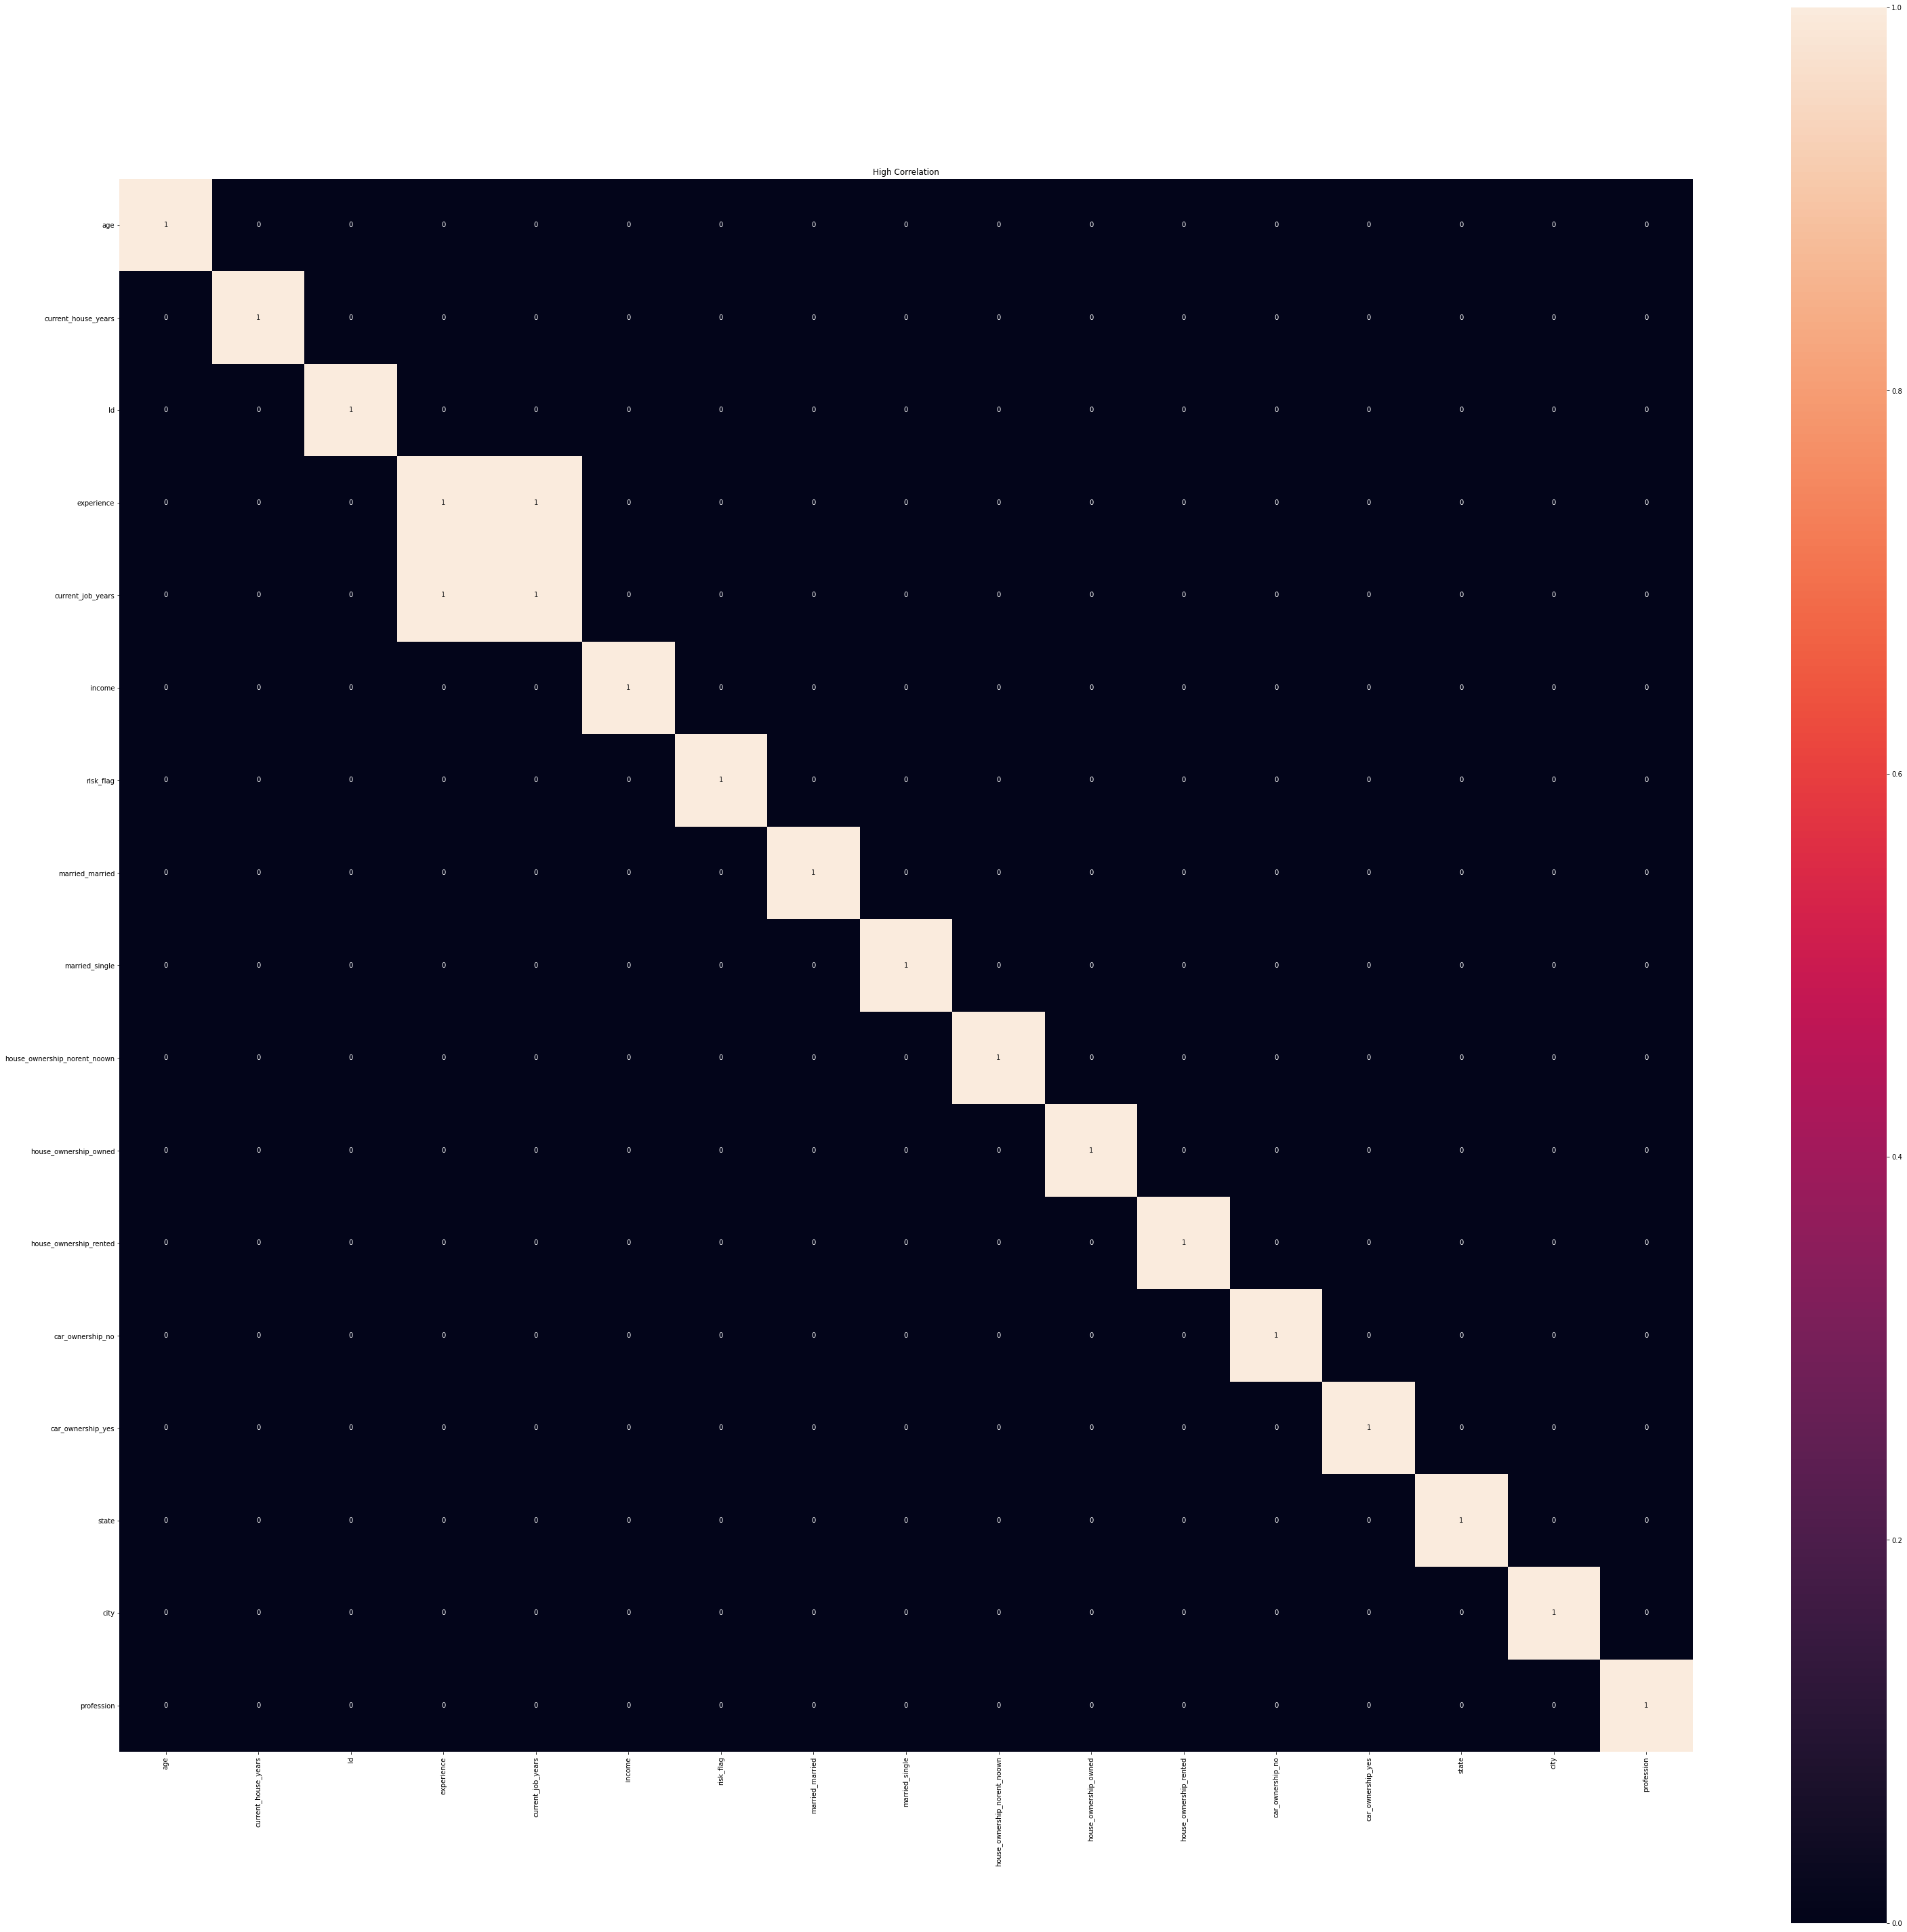

In [20]:
plt.figure(figsize=(52,52))
plt.title('High Correlation')
sns.heatmap(df_corr > 0.5, annot=True, square=True)

In [21]:
corr = df_corr.corr()
cdf = pd.DataFrame(pd.concat([df_corr['risk_flag'],corr['risk_flag']],\
                             axis='columns'))
cdf.columns = ['corr(x)','corr(corr(x))']
cdf.sort_values(by='corr(corr(x))',axis=0,ascending=False)

,corr(x),corr(corr(x))
risk_flag,1.000000,1.000000
house_ownership_rented,0.026647,0.074079
car_ownership_no,0.024036,0.054636
married_single,0.021092,0.044206
Id,0.032153,0.008982
city,0.004575,-0.042990
married_married,-0.021092,-0.044206
house_ownership_norent_noown,-0.012243,-0.051716
car_ownership_yes,-0.024036,-0.054636
income,-0.003091,-0.064221


# Checking Balance of Data

<AxesSubplot:xlabel='risk_flag', ylabel='count'>

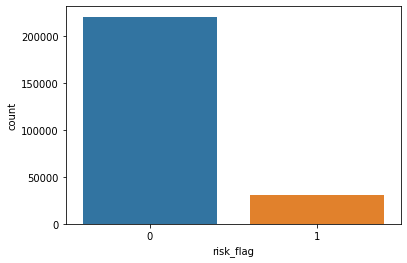

In [24]:
sns.countplot(df_final["risk_flag"])

In [25]:
df_final['risk_flag'].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [26]:
a=df_final['risk_flag'].value_counts()

In [27]:
a[0]/a[1]

7.130081300813008

In [30]:
pickle.dump(Encoders, open('Encoders.pkl', 'wb'))

In [32]:
df_final.to_csv('train_Data_preprocessed_encoded.csv',index=None)

# Dealing with Outlier

In [ ]:
# Dealing with Outliers
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10),(ax11,ax12)) = plt.subplots(nrows=6, ncols=2)
figure.set_size_inches(16,28)
_ = sns.regplot(df['income'], df['risk_flag'], ax=ax1)
_ = sns.regplot(df['age'], df['risk_flag'], ax=ax2)
_ = sns.regplot(df['experience'], df['risk_flag'], ax=ax3)
_ = sns.regplot(df['married'], df['risk_flag'], ax=ax4)
_ = sns.regplot(df['house_ownership'], df['risk_flag'], ax=ax5)
_ = sns.regplot(df['car_ownership'], df['risk_flag'], ax=ax6)
_ = sns.regplot(df['profession'], df['risk_flag'], ax=ax7)
_ = sns.regplot(df['city'], df['risk_flag'], ax=ax8)
_ = sns.regplot(df['state'], df['risk_flag'], ax=ax9)
_ = sns.regplot(df['current_job_years'], df['risk_flag'], ax=ax10)
_ = sns.regplot(df['current_house_years'], df['risk_flag'], ax=ax11)
_ = sns.regplot(df['risk_flag'], df['risk_flag'], ax=ax12)
